# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import csv
import os
from bs4 import BeautifulSoup

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv("SINASC_RO_2019.csv")
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:
# Criando as faixas de Latitude em uma nova coluna
# Antes de começar, pensei em uma abordagem diferente, como são apenas 2 faixas, pesquisei um método de cortar o df
# Assim, na listagem de métodos do pandas, encontrei o cut e trabalhei nele para que obtivesse meu objetivo
sinasc_raw["Latitude"] = pd.cut(sinasc_raw["munResLat"],
                                bins = [-float("inf"), -10.5, float("inf")],
                                labels = ["Região intermediária de Porto Velho", "Região intermediária de Ji-Paraná"])

# Realizando operações estatísticas nas variáveis numéricas selecinadas como potencialmente relevantes para insights
sinasc_lat_estat = sinasc_raw.groupby("Latitude").agg({"CONSULTAS":
                                                       [("soma", "sum"),
                                                        ("média", "mean"),
                                                        ("mín.", "min"),
                                                        ("máx.", "max"),
                                                        ("mediana", "median"),
                                                        ("D.P.", "std"),
                                                        ("var.", "var")],
                                                       "LOCNASC":
                                                       [("soma", "sum"),
                                                        ("média", "mean"),
                                                        ("mín.", "min"),
                                                        ("máx.", "max"),
                                                        ("mediana", "median"),
                                                        ("D.P.", "std"),
                                                        ("var.", "var")]}).round(2)

sinasc_lat_estat

CONSULTAS                                \
                                         soma média mín. máx. mediana  D.P.   
Latitude                                                                      
Região intermediária de Porto Velho     48000  3.69    1    9     4.0  0.64   
Região intermediária de Ji-Paraná       48662  3.47    1    9     4.0  0.89   

                                          LOCNASC                          \
                                     var.    soma média mín. máx. mediana   
Latitude                                                                    
Região intermediária de Porto Velho  0.41   13116  1.01    1    4     1.0   
Região intermediária de Ji-Paraná    0.79   14219  1.01    1    4     1.0   

                                                 
                                     D.P.  var.  
Latitude                                         
Região intermediária de Porto Velho  0.15  0.02  
Região intermediária de Ji-Paraná    0.18  0.03

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [4]:
sinasc_raw["Area"] = pd.cut(sinasc_raw["munResArea"],
                                bins = [-float("inf"), 3000, float("inf")],
                                labels = ["Pequeno a médio porte", "Grande porte"])

sinasc_lat_estat = sinasc_raw.groupby("Area").agg({"CONSULTAS":
                                                   [("soma", "sum"),
                                                    ("média", "mean"),
                                                    ("mín.", "min"),
                                                    ("máx.", "max"),
                                                    ("mediana", "median"),
                                                    ("D.P.", "std"),
                                                    ("var.", "var")],
                                                   "LOCNASC":
                                                   [("soma", "sum"),
                                                    ("média", "mean"),
                                                    ("mín.", "min"),
                                                    ("máx.", "max"),
                                                    ("mediana", "median"),
                                                    ("D.P.", "std"),
                                                    ("var.", "var")]}).round(2)

sinasc_lat_estat

CONSULTAS                                     LOCNASC  \
                           soma média mín. máx. mediana  D.P.  var.    soma   
Area                                                                          
Pequeno a médio porte     19520  3.74    1    9     4.0  0.61  0.37    5258   
Grande porte              77142  3.54    1    9     4.0  0.82  0.67   22077   

                                                           
                      média mín. máx. mediana  D.P.  var.  
Area                                                       
Pequeno a médio porte  1.01    1    4     1.0  0.13  0.02  
Grande porte           1.01    1    4     1.0  0.17  0.03

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
sinasc_raw["munResAlt"].unique() # Verificando quais os valores para melhor entender como operar sobre eles

array([338., 397., 230., 227., 270., 139., 111., 128., 155., 163., 124.,
        87., 161.,  99., 157., 153., 595., 158.,  85., 145., 206., 144.,
       419., 151., 197., 252., 269., 191., 202., 265., 186., 212., 263.,
       178., 177., 296., 166., 266., 259., 182., 245.,  nan, 215., 340.,
       133., 192., 241., 154., 170., 236.])

In [6]:
sinasc_raw["Altitude"] = pd.qcut(sinasc_raw["munResAlt"], q=4, labels=["Mais baixo", "Baixo", "Médio", "Mais elevado"])

In [7]:
sinasc_alt_estat = sinasc_raw.groupby("Altitude").agg({"IDANOMAL":
                                                   [("soma", "sum"),
                                                    ("média", "mean"),
                                                    ("mín.", "min"),
                                                    ("máx.", "max"),
                                                    ("mediana", "median"),
                                                    ("D.P.", "std"),
                                                    ("var.", "var")],
                                                   "QTDGESTANT":
                                                   [("soma", "sum"),
                                                    ("média", "mean"),
                                                    ("mín.", "min"),
                                                    ("máx.", "max"),
                                                    ("mediana", "median"),
                                                    ("D.P.", "std"),
                                                    ("var.", "var")]}).round()

sinasc_alt_estat

IDANOMAL                                   QTDGESTANT             \
                 soma média mín. máx. mediana D.P. var.       soma média mín.   
Altitude                                                                        
Mais baixo    17058.0   2.0  1.0  9.0     2.0  1.0  1.0    11258.0   1.0  0.0   
Baixo          9655.0   2.0  1.0  9.0     2.0  0.0  0.0     6568.0   1.0  0.0   
Médio         14010.0   2.0  1.0  9.0     2.0  0.0  0.0     7790.0   1.0  0.0   
Mais elevado  12943.0   2.0  1.0  9.0     2.0  0.0  0.0     7300.0   1.0  0.0   

                                      
              máx. mediana D.P. var.  
Altitude                              
Mais baixo    14.0     1.0  1.0  2.0  
Baixo         52.0     1.0  2.0  3.0  
Médio         10.0     1.0  1.0  2.0  
Mais elevado  12.0     1.0  1.0  1.0

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [8]:
sinasc_raw["munResNome"].unique() # Para obter o que de fato esta na base de dados

array(["Alta Floresta D'Oeste", 'Alto Alegre dos Parecis',
       'Novo Horizonte do Oeste', 'Rolim de Moura', "São Felipe D'Oeste",
       'Ariquemes', 'Cujubim', 'Alto Paraíso', 'Monte Negro', 'Jaru',
       'Rio Crespo', 'Porto Velho', 'Cacaulândia', 'Itapuã do Oeste',
       'Ji-Paraná', 'Buritis', 'Vilhena', 'Vale do Anari',
       'Candeias do Jamari', 'Costa Marques', 'Campo Novo de Rondônia',
       "Machadinho D'Oeste", 'Colorado do Oeste', 'Nova Mamoré', 'Urupá',
       'Ouro Preto do Oeste', 'Corumbiara', 'São Miguel do Guaporé',
       'Governador Jorge Teixeira', "Santa Luzia D'Oeste",
       'Pimenta Bueno', 'Mirante da Serra', 'Cerejeiras',
       'Presidente Médici', 'Cacoal', 'Parecis', "Espigão D'Oeste",
       'São Francisco do Guaporé', 'Ministro Andreazza',
       "Nova Brasilândia D'Oeste", "Alvorada D'Oeste",
       'Primavera de Rondônia', 'Seringueiras', 'Município ignorado - RO',
       'Castanheiras', 'Chupinguaia', 'Guajará-Mirim', 'Theobroma',
       'Nova 

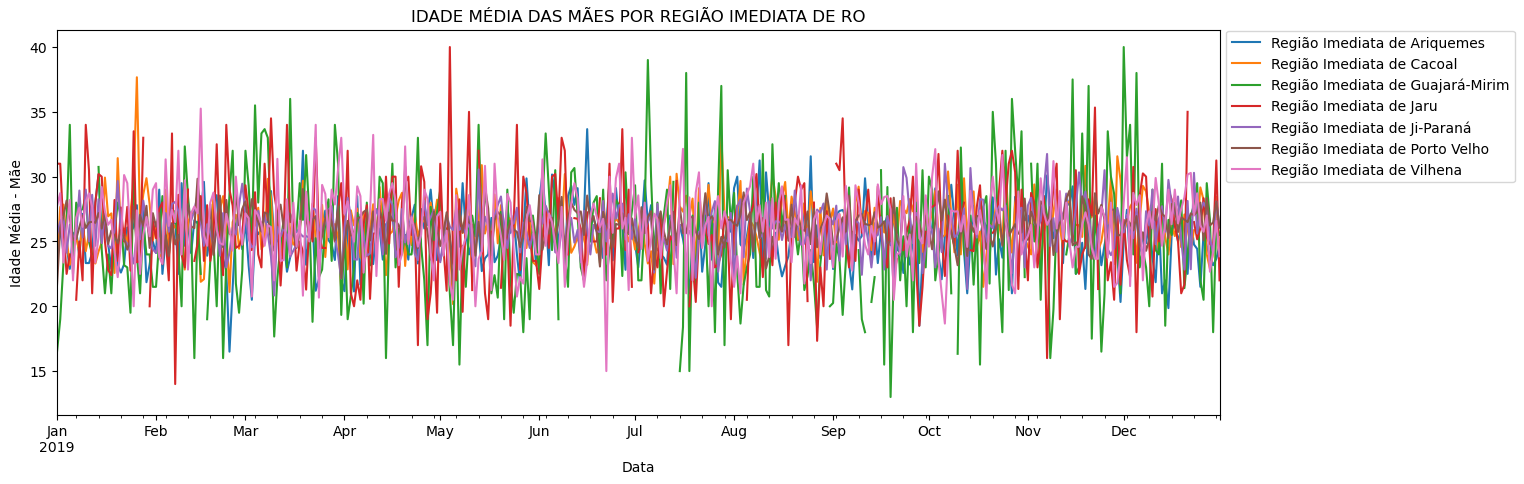

In [9]:
# Tratando da variável tempo ao longo de 2019
sinasc_raw["DTNASC"] = pd.to_datetime(sinasc_raw["DTNASC"], format = "%Y-%m-%d")
sinasc_raw = sinasc_raw.sort_values("DTNASC")

# Criando "Região Imediata" com a sequência de regiões listadas acima cruzando dados com o link referência
sinasc_raw["Região Imediata"] = sinasc_raw["munResNome"].map({
    "Porto Velho": "Região Imediata de Porto Velho",
    "São Miguel do Guaporé": "Região Imediata de Ji-Paraná",
    "Ji-Paraná": "Região Imediata de Ji-Paraná",
    "Costa Marques": "Região Imediata de Guajará-Mirim",
    "Cujubim": "Região Imediata de Ariquemes",
    "Vilhena": "Região Imediata de Vilhena",
    "Ouro Preto do Oeste": "Região Imediata de Ji-Paraná",
    "Nova Brasilândia D'Oeste": "Região Imediata de Cacoal",
    "Ariquemes": "Região Imediata de Ariquemes",
    "Governador Jorge Teixeira": "Região Imediata de Jaru",
    "Alto Alegre dos Parecis": "Região Imediata de Cacoal",
    "Cacoal": "Região Imediata de Cacoal",
    "Guajará-Mirim": "Região Imediata de Guajará-Mirim",
    "Vale do Anari": "Região Imediata de Jaru",
    "Urupá": "Região Imediata de Ji-Paraná",
    "Candeias do Jamari": "Região Imediata de Porto Velho",
    "Rolim de Moura": "Região Imediata de Cacoal",
    "Pimenta Bueno": "Região Imediata de Cacoal",
    "Alta Floresta D'Oeste": "Região Imediata de Cacoal",
    "Buritis": "Região Imediata de Ariquemes",
    "Espigão D'Oeste": "Região Imediata de Cacoal",
    "Jaru": "Região Imediata de Jaru",
    "Colorado do Oeste": "Região Imediata de Vilhena",
    "Alto Paraíso": "Região Imediata de Ariquemes",
    "Pimenteiras do Oeste": "Região Imediata de Vilhena",
    "Nova União": "Região Imediata de Ji-Paraná",
    "Machadinho D'Oeste": "Região Imediata de Ji-Paraná",
    "Vale do Paraíso": "Região Imediata de Ji-Paraná",
    "Novo Horizonte do Oeste": "Região Imediata de Cacoal",
    "São Francisco do Guaporé": "Região Imediata de Ji-Paraná",
    "Itapuã do Oeste": "Região Imediata de Porto Velho",
    "Presidente Médici": "Região Imediata de Ji-Paraná",
    "Teixeirópolis": "Região Imediata de Ji-Paraná",
    "Chupinguaia": "Região Imediata de Vilhena",
    "Cabixi": "Região Imediata de Vilhena",
    "Theobroma": "Região Imediata de Jaru",
    "Santa Luzia D'Oeste": "Região Imediata de Cacoal",
    "Ministro Andreazza": "Região Imediata de Cacoal",
    "Cerejeiras": "Região Imediata de Vilhena",
    "Monte Negro": "Região Imediata de Ariquemes",
    "Mirante da Serra": "Região Imediata de Ji-Paraná",
    "Seringueiras": "Região Imediata de Ji-Paraná",
    "Campo Novo de Rondônia": "Região Imediata de Ariquemes",
    "Nova Mamoré": "Região Imediata de Porto Velho",
    "Corumbiara": "Região Imediata de Vilhena",
    "Alvorada D'Oeste": "Região Imediata de Ji-Paraná",
    "Cacaulândia": "Região Imediata de Ariquemes",
    "Parecis": "Região Imediata de Cacoal",
    "Rio Crespo": "Região Imediata de Ariquemes",
    "São Felipe D'Oeste": "Região Imediata de Cacoal",
    "Castanheiras": "Região Imediata de Cacoal",
    "Primavera de Rondônia": "Região Imediata de Cacoal"
})

sinasc_reg_imed = sinasc_raw.groupby(["DTNASC", "Região Imediata"])["IDADEMAE"].mean().unstack().plot(kind="line",
                                                                                                     figsize=[15,5])

# Configurando o gráfico
plt.title("IDADE MÉDIA DAS MÃES POR REGIÃO IMEDIATA DE RO")
plt.xlabel("Data")
plt.ylabel("Idade Média - Mãe")
plt.legend(title = "Região Imediata")
ax = plt.gca()
ax.legend(loc="center left", bbox_to_anchor=(1, 0.8))

plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [10]:
# Arquivando o local na variável url
url_idh_RO = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M"

# Realizando a solicitação para obter o conteúdo da página
response = requests.get(url_idh_RO)

# Verificando se a solicitação foi bem-sucedida
if response.status_code == 200:
    # Lendo as tabelas da página e obtendo os dados, com a codificação necessária
    tabelas = pd.read_html(response.content, encoding = "ISO-8859-1") # demandou muitas pesquisas mas deu certo
    tabela_IDH = tabelas[0]

    # Removendo as duas primeiras linhas e os subtitulos da tabela
    tabela_IDH = tabela_IDH.iloc[2:]
    subtitulos = [9, 46, 56, 57]
    tabela_IDH = tabela_IDH.drop(index = subtitulos)

    # Salvando a tabela em um arquivo .csv sem o índice
    tabela_IDH.to_csv("dadosIDH_RO.csv", index = False, encoding = "ISO-8859-1", header = False)

    # Abrindo o arquivo em modo de escrita
    with open("dadosIDH_RO.csv", "r", encoding="ISO-8859-1") as f:
        # Lendo todo o conteúdo do arquivo
        conteudo = f.read()

    # Adicionando o cabeçalho no início do conteúdo
    cabecalho = "Posicao,Municipio,IDH_mun,IDH_rend,IDH_longev,IDH_educ\n"
    conteudo_final = cabecalho + conteudo

    # Reabrindo o arquivo para reescrever o conteúdo final
    with open("dadosIDH_RO.csv", "w", encoding = "ISO-8859-1") as f:
        f.write(conteudo_final)

    print("O arquivo 'dadosIDH_RO.csv' foi salvo com sucesso.")
else:
    print("Não foi possível acessar a página. Verifique a URL ou a conexão com a internet.")

O arquivo 'dadosIDH_RO.csv' foi salvo com sucesso.


In [11]:
# Abrindo para copiar e criar um novo arquivo para comparação posterior
dados_idh_RO = pd.read_csv("dadosIDH_RO.csv")
dados_idh_RO_copia = dados_idh_RO.copy()

# Convertendo a coluna "IDH_mun" para o tipo float
dados_idh_RO["IDH_mun"] = pd.to_numeric(dados_idh_RO["IDH_mun"])

# Definindo os limites das Afaixas de IDH de acordo com o PNUD desde 2013
limites_faixas = [0, 0.5, 0.6, 0.7, 0.8, 1]
nomes_faixas = ["Muito Baixo", "Baixo", "Médio", "Alto", "Muito Alto"]

# Substituir os valores das faixas pelos nomes correspondentes
dados_idh_RO["Faixas_IDH"] = pd.cut(dados_idh_RO["IDH_mun"], bins = limites_faixas, labels = nomes_faixas)

# Salvando a cópia
dados_idh_RO_copia.to_csv("dadosIDH_RO_copia.csv", index=False)

# Agrupando usando as faixas como chave e calculando a media, máximo e mínimo, inicialmente apenas
idh_RO_por_faixa_2010 = dados_idh_RO.groupby("Faixas_IDH").agg({"IDH_mun":
                                                          [("média", "mean"),
                                                           ("máx.", "max"),
                                                           ("mín.", "min")],
                                                          "IDH_rend":
                                                          [("média", "mean"),
                                                           ("máx.", "max"),
                                                           ("mín.", "min")],
                                                          "IDH_longev":
                                                          [("média", "mean"),
                                                           ("máx.", "max"),
                                                           ("mín.", "min")],
                                                          "IDH_educ":
                                                          [("média", "mean"),
                                                           ("máx.", "max"),
                                                           ("mín.", "min")]}).round(3)

idh_RO_por_faixa_2010 = idh_RO_por_faixa_2010.dropna() # Excluindo as faixas sem dados
idh_RO_por_faixa_2010

IDH_mun               IDH_rend               IDH_longev         \
             média   máx.   mín.    média   máx.   mín.      média   máx.   
Faixas_IDH                                                                  
Baixo        0.591  0.598  0.584    0.627  0.667  0.603      0.764  0.779   
Médio        0.645  0.700  0.607    0.654  0.709  0.604      0.791  0.825   
Alto         0.718  0.736  0.702    0.732  0.764  0.716      0.811  0.821   

                  IDH_educ                
             mín.    média   máx.   mín.  
Faixas_IDH                                
Baixo       0.753    0.432  0.446  0.404  
Médio       0.751    0.520  0.602  0.439  
Alto        0.803    0.624  0.659  0.600

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [12]:
# Arquivando o local na variável url
url_ifdm_RO = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM"

# Realizando a solicitação para obter o conteúdo da página
response = requests.get(url_ifdm_RO)

# Verificando se a solicitação foi bem-sucedida
if response.status_code == 200:
    # Lendo as tabelas da página e obtendo os dados, com a codificação necessária
    tabela_IFDM = pd.read_html(response.content, encoding="utf-8") # demandou muitas pesquisas mas deu certo
    print(tabela_IFDM)

    # Salvando a tabela em um arquivo .csv sem o índice
    tabela_IFDM[0].to_csv("dadosIFDM_RO.csv", index = False, encoding = "utf-8", header = False)

    # Abrindo o arquivo em modo de leitura
    with open("dadosIFDM_RO.csv", "r", encoding = "utf-8") as f:
        # Lendo todo o conteúdo do arquivo
        conteudo = f.read()

    # Adicionando o cabeçalho no início do conteúdo
    cabecalho = "Posicao,Municipio,IFDM\n"
    conteudo_final = cabecalho + conteudo

    # Reabrindo o arquivo para reescrever o conteúdo final
    with open("dadosIFDM_RO.csv", "w", encoding = "utf-8") as f:
        f.write(conteudo_final)

    print("O arquivo 'dadosIFDM_RO.csv' foi salvo com sucesso.")
else:
    print("Não foi possível acessar a página. Verifique a URL ou a conexão com a internet.")

# Abrindo para copiar e criar um novo arquivo para comparação posterior
dados_ifdm_RO = pd.read_csv("dadosIFDM_RO.csv")

# Verificando se a coluna "IFDM" contém apenas valores numéricos
dados_ifdm_RO["IFDM"] = pd.to_numeric(dados_ifdm_RO["IFDM"], errors = "coerce")  # Convertendo para tipo numérico e tratando erros

# Removendo linhas com valores inválidos na coluna "IFDM"
dados_ifdm_RO = dados_ifdm_RO.dropna(subset = ["IFDM"])

# Definindo os limites das faixas de IFDM de acordo com o PNUD desde 2013
limites_faixas = [0, 0.4, 0.6, 0.8, 1]
nomes_faixas = ["Baixo", "Regular", "Moderado", "Alto"]

# Substituir os valores das faixas pelos nomes correspondentes
dados_ifdm_RO["Faixas_IFDM"] = pd.cut(dados_ifdm_RO["IFDM"], bins=limites_faixas, labels=nomes_faixas)

# Salvando a cópia
dados_ifdm_RO.to_csv("dadosIFDM_RO_copia.csv", index = False)

# Agrupando usando as faixas como chave e calculando a media, máximo e mínimo, inicialmente apenas
ifdm_RO_por_faixa_2013 = dados_ifdm_RO.groupby("Faixas_IFDM").agg({"IFDM": [("média", "mean"),
                                                                            ("máx.", "max"),
                                                                            ("mín.", "min")]}).round(3)

ifdm_RO_por_faixa_2013 = ifdm_RO_por_faixa_2013.dropna() # Excluindo as faixas sem dados
ifdm_RO_por_faixa_2013

[                     Posição                  Município  \
        Desenvolvimento alto       Desenvolvimento alto   
0           nenhum município           nenhum município   
1   Desenvolvimento moderado   Desenvolvimento moderado   
2                         1º                  Ariquemes   
3                         2º                    Vilhena   
4                         3º              Pimenta Bueno   
5                         4º                Porto Velho   
6                         5º                  Ji-Paraná   
7                         6º                     Cacoal   
8                         7º        Santa Luzia d'Oeste   
9                         8º             Rolim de Moura   
10                        9º                Chupinguaia   
11                       10º      São Miguel do Guaporé   
12                       11º       Pimenteiras do Oeste   
13                       12º              Teixeirópolis   
14                       13º          Colorado do Oeste

IFDM              
             média   máx.   mín.
Faixas_IFDM                     
Regular      0.556  0.597  0.456
Moderado     0.660  0.775  0.601

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB

In [13]:
# Arquivando o local na variável url
url_pib_RO = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB"
# Realizando a solicitação para obter o conteúdo da página
response = requests.get(url_pib_RO)

# Verificando se a solicitação foi bem-sucedida
if response.status_code == 200:
    print("Requisição bem sucedida!")
    content = response.content

# Extraindo o conteúdo com o BeautifulSoap
soup = BeautifulSoup(content, "html.parser")
tabelas = soup.find_all(name = "table")

# Convertendo em string
tabelas_str = str(tabelas)

# Incluindo em um Pandas DataFrame 
df_pib = pd.concat([pd.read_html(tabelas_str)[0],
                    pd.read_html(tabelas_str)[1],
                    pd.read_html(tabelas_str)[2],
                    pd.read_html(tabelas_str)[3],
                    pd.read_html(tabelas_str)[4],
                    pd.read_html(tabelas_str)[5]],
                   ignore_index = True)

# Agora com o DataFrame com as tabelas separadas, tratando-os dados para manipulação

# Ajustando as colunas:
df_pib.columns = ["Posição 2019", "Mudança 2014", "Município", "PIB", "Alteração", "Posição 2014", "Mudança 2011"]
df_pib.drop(["Posição 2019", "Mudança 2014", "Alteração", "Posição 2014", "Mudança 2011"], axis = 1, inplace = True)

# Ajustando os dados das colunas, principalmente as numéricas pois além de conter espaços, estão como string
df_pib["PIB"] = df_pib["PIB"].apply(lambda x: x.replace(" ", ""))
df_pib["PIB"] = df_pib["PIB"].astype("float")
df_pib["Município"] = df_pib["Município"].apply(lambda x: x.capitalize())

# Ajustando os nomes de alguns municípios em particular:
df_pib["Município"] = df_pib["Município"].replace({"Alta floresta do oeste": "Alta floresta d'oeste",
                                                   "Alvorada do oeste": "Alvorada d'oeste",
                                                   "Nova brasilândia do oeste": "Nova brasilândia d'oeste",
                                                   "Santa luzia do oeste": "Santa luzia d'oeste",
                                                   "São felipe do oeste": "São felipe d'oeste"})

# Salvar o DataFrame completo em um arquivo CSV com a codificação correta
nome_aux = "dadosPIB_RO.csv"
df_pib.to_csv(nome_aux, index = False, encoding = "utf-8-sig")
dados_pib_RO = pd.read_csv("dadosPIB_RO.csv")

# Verificando se a coluna "PIB" contém apenas valores numéricos
dados_pib_RO["PIB"] = pd.to_numeric(dados_pib_RO["PIB"], errors = "coerce")  # Convertendo para tipo numérico e tratando erros

# Removendo linhas com valores inválidos na coluna "PIB"
dados_pib_RO = dados_pib_RO.dropna(subset=["PIB"])

# Definindo os limites das faixas de PIB de acordo com o PNUD desde 2013
limites_faixas = [0, 100000, 200000, 300000, 500000, 1000000, 20000000]
nomes_faixas = ["Até 100 milhões",
                "Acima de 100 milhões",
                "Acima de 200 milhões",
                "Acima de 300 milhões",
                "Acima de 500 milhões",
                "Acima de 1 bilhão"]

# Substituir os valores das faixas pelos nomes correspondentes
dados_pib_RO["Faixas_PIB"] = pd.cut(dados_pib_RO["PIB"], bins = limites_faixas, labels = nomes_faixas)

# Salvando a cópia
dados_pib_RO.to_csv("dadosPIB_RO_copia.csv", index=False)

dados_pib_RO["Faixas_PIB"] = dados_pib_RO["Faixas_PIB"].str.strip()

# Agrupando usando as faixas como chave e calculando a média, máximo e mínimo
pib_RO_por_faixa_2019 = dados_pib_RO.groupby("Faixas_PIB").agg({"PIB": [("media", "mean"),
                                                                        ("maximo", "max"),
                                                                        ("minimo", "min")]}).round()

pib_RO_por_faixa_2019 = pib_RO_por_faixa_2019.dropna() # Excluindo as linhas sem dados
pib_RO_por_faixa_2019

Requisição bem sucedida!


PIB                       
                          media      maximo     minimo
Faixas_PIB                                            
Acima de 1 bilhão     4164736.0  17912070.0  1164877.0
Acima de 100 milhões   147845.0    190331.0   105208.0
Acima de 200 milhões   211370.0    219152.0   204098.0
Acima de 300 milhões   387857.0    496000.0   335000.0
Acima de 500 milhões   656778.0    893000.0   507000.0
Até 100 milhões         72947.0     92346.0    52908.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

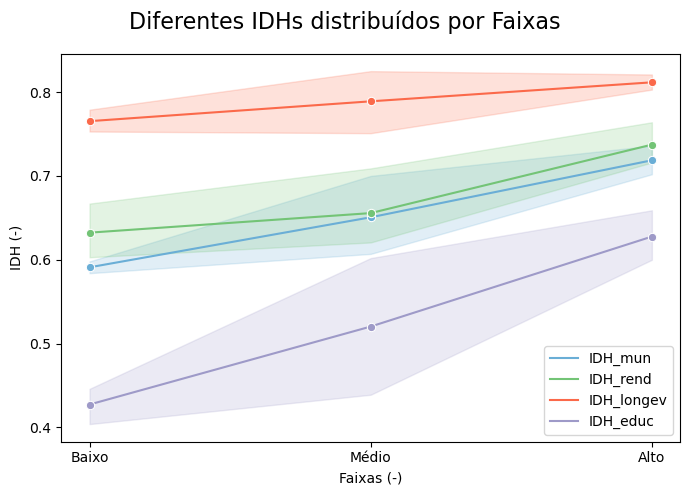

In [14]:
# Configuração do layout dos gráficos
fig, ax = plt.subplots(figsize=(7, 5))
fig.suptitle("Diferentes IDHs distribuídos por Faixas", fontsize=16)

# Município
sns.lineplot(data=idh_RO_por_faixa_2010.iloc[:, :3], ax=ax, marker='o', palette='Blues')
ax.set_xlabel("Faixas (-)")

# Renda
sns.lineplot(data=idh_RO_por_faixa_2010.iloc[:, 3:6], ax=ax, marker='o', palette='Greens')
ax.set_xlabel("Faixas (-)")

# Longevidade
sns.lineplot(data=idh_RO_por_faixa_2010.iloc[:, 6:9], ax=ax, marker='o', palette='Reds')
ax.set_xlabel("Faixas (-)")

# Educação
sns.lineplot(data=idh_RO_por_faixa_2010.iloc[:, 9:], ax=ax, marker='o', palette='Purples')
ax.set_xlabel("Faixas (-)")

ax.set_ylabel("IDH (-)")
plt.tight_layout()
plt.show()

Há 3 insights interessantes que surgem instataneamente ao olharmos para o gráfico:
- O IDH por longevidade é praticamente horizontal, onde o valor minímo da faixa Médio é o mesmo da faixa Baixo + valor máximo da faixa Médio é o mesmo da faixa Alto, implicando que praticamente não há variação nos dados e a faixa Médio é uma forte representação pro indicador;
- Os IDHs da Renda e Município possuem regiões semelhantes de valores mas comportamentos diferentes: a Renda é o único IDH que não possui uma tendência linear no crescimento, indicando que a distribuição dos dados não é simétrica na média, exibindo um padrão de desigualdade entre as faixas;
- O IDH da educação possui maior variação nos dados e menor pontução, uma vez que seus dados na faixa Alto são praticamente os mesmos que as faixas Baixo do IDH Renda e Município, mostrando que a Educação esta mais frágil frente ao desenvolvimento humano, pois varia muito dentro de valores menores;

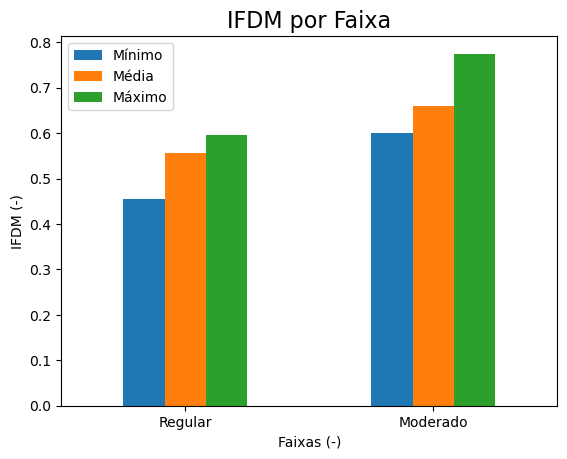

In [15]:
# Selecionar as colunas de média, máxima e mínima
dados = ifdm_RO_por_faixa_2013[('IFDM', 'mín.')].reset_index()
dados['Média'] = ifdm_RO_por_faixa_2013[('IFDM', 'média')].values
dados['Máximo'] = ifdm_RO_por_faixa_2013[('IFDM', 'máx.')].values

# Plotar o gráfico de barras
dados.plot(x='Faixas_IFDM', kind='bar', rot=0, legend=True)
plt.xlabel('Faixas (-)')
plt.ylabel('IFDM (-)')
plt.title('IFDM por Faixa', fontsize=16)
plt.legend(['Mínimo', 'Média', 'Máximo'])
plt.show()

É notável que o IFDM tem seus dados centralizados, de tal forma que as 2 faixas extremas não possuem dados. Também nota-se que a média da faixa Regular se aproxima do valor máximo e a média da faixa Moderado se aproxima do mínimo, levando a ambas médias a ficarem mais próximas.

Tendências centrais auxiliam na análise estatistica assumindo distribuições de cunho normal, oferencendo diversas ferramentas para melhor avaliar este indicador.

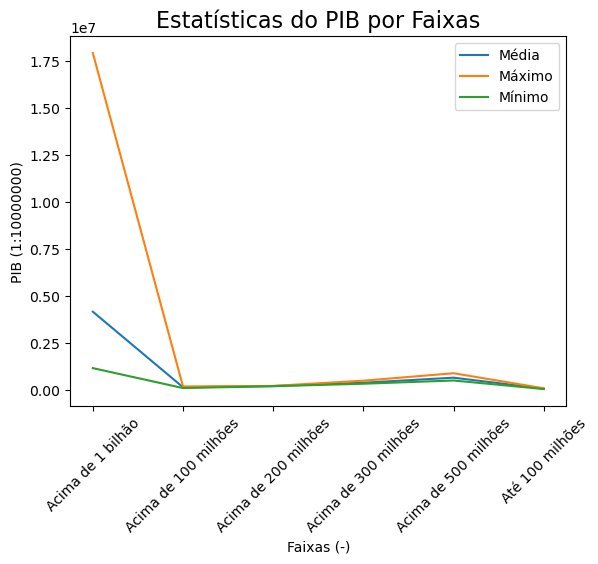

In [16]:
# Plotando as três séries separadamente pelo índice das colunas
pib_RO_por_faixa_2019.iloc[:, 0].plot(label = "Média")
pib_RO_por_faixa_2019.iloc[:, 1].plot(label = "Máximo")
pib_RO_por_faixa_2019.iloc[:, 2].plot(label = "Mínimo")

# Configurando este simples gráfico
plt.xticks(rotation = 45)
plt.xlabel("Faixas (-)")
plt.ylabel("PIB (1:10000000)")
plt.title("Estatísticas do PIB por Faixas", fontsize=16)
plt.legend()
plt.show()

O gráfico mostra que as faixas não fazem a minuscula comparação com os dados "Acima de 1 bilhão", mostrando a completa desproporção na renda entre faixas. Deseigualdade econômica permeia estes dados, o que leva a diversas possibilidades de insights sobre a região, dependendo da abordagem frente a renda populacional que ali reside.